In [814]:
!pip3 install numpy
!echo 'y' | conda install -c conda-forge wordcloud


Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py38h50d1736_1         143 KB  conda-forge
    openssl-1.1.1j             |       hbcf498f_0         1.9 MB  conda-forge
    wordcloud-1.8.1            |   py38h5406a74_1         170 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py38h5406a74_1

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-h033912b_0
  

In [817]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import wordcloud

In [697]:
roster_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Ultipro Data - Employee Roster.csv')
new_hire_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Ultipro Data - New Hires.csv')
changes_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Ultipro Data - Changes.csv')
terms_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Ultipro Data - Terms.csv')
application_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR iCims Applicant Data.csv')
merged_df = pd.read_csv('/Users/mengtianli/Downloads/HR/beast_v3.csv')
salary_df = pd.read_csv('/Users/mengtianli/Downloads/HR/beast_v1.csv')
senority_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Ultipro Data - 2017 Employee Roster.csv')

In [698]:
merged_df.columns

Index(['eeid', 'region_hired', 'eoc', 'success_profile_hired', 'manager_hired',
       'bu_hired', 'Voluntary/Involuntary', 'term_type', 'term_indicator',
       'rehires_indicator', 'multiple_terms_indicator', 'demotions', 'lateral',
       'promotions', 'supervisor_changes', 'org_changes',
       'voluntary_separation', 'termed_for_cause', 'temp_job_ended',
       'position_elimination', 'other_term_reason', 'num_applications',
       'salary_grade_current', 'region_current', 'success_profile_current',
       'bu_current', 'manager_current', 'last_change_date', 'start_date'],
      dtype='object')

In [699]:
salary_df = salary_df[['eeid', 'salary_grade_hired']]

In [700]:
merged_df = merged_df.merge(salary_df, on='eeid', how='left')

In [701]:
merged_df['salary_grade_current'] = merged_df.apply(lambda row: row.salary_grade_hired if pd.isnull(row.salary_grade_current) else row.salary_grade_current, axis=1)

In [702]:
merged_df = merged_df.drop(columns=['manager_hired', 'manager_current', 'salary_grade_hired'])

In [703]:
merged_df.num_applications = merged_df.num_applications.fillna(0)

In [704]:
merged_df['start_date'] = pd.to_datetime(merged_df['start_date'], format='%Y-%m-%d', errors='coerce')
merged_df['last_change_date'] = pd.to_datetime(merged_df['last_change_date'], format='%Y-%m-%d', errors='coerce')

In [705]:
merged_df

,eeid,region_hired,eoc,success_profile_hired,bu_hired,Voluntary/Involuntary,term_type,term_indicator,rehires_indicator,multiple_terms_indicator,...,temp_job_ended,position_elimination,other_term_reason,num_applications,salary_grade_current,region_current,success_profile_current,bu_current,last_change_date,start_date
0,00139bda1e4e47e192d87b3a17e0e68280dbb4d259fcfb...,DelMarVa,No,Success Profile 12,Business Unit 9,NaN,NaN,0,0,0,...,0,0,0,1.0,Salary Grade 43,DelMarVa,Success Profile 12,Business Unit 9,2018-07-01,2017-03-15
1,001a45dd8c745c17432b6e8bb3f7eae08cb216df1d4f64...,Central PA,No,Success Profile 8,Business Unit 3,NaN,NaN,0,0,0,...,0,0,0,0.0,Salary Grade 26,Central PA,Success Profile 8,Business Unit 9,2018-12-01,2013-09-03
2,0026a2ad36a89c2e8a7985caea92b9d6d95dd6c3273557...,Central PA,No,Success Profile 3,Business Unit 12,Voluntary,Voluntary Separation,1,0,0,...,0,0,0,0.0,Salary Grade 13,Central PA,Success Profile 3,Business Unit 12,2017-10-27,2000-05-01
3,0036c821b56239707ecc1dab277fc5de9c394b0fab71e4...,Southeastern PA,No,Success Profile 10,Business Unit 9,NaN,NaN,0,0,0,...,0,0,0,0.0,Salary Grade 33,Southeastern PA,Success Profile 7,Business Unit 9,2018-07-01,2010-04-26
4,00380f8c2cb63b8f2ae64ed1a916f792204e61233577d0...,New Jersey,Yes,Success Profile 5,Business Unit 5,Voluntary,Voluntary Separation,1,0,0,...,0,0,0,5.0,Salary Grade 41,New Jersey,Success Profile 5,Business Unit 5,2018-12-29,2017-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,ffdf235139f852de522d8e413de512b46ea1e0f775bf83...,Central PA,No,Success Profile 6,Business Unit 5,NaN,NaN,0,0,0,...,0,0,0,0.0,Salary Grade 41,Central PA,Success Profile 5,Business Unit 5,2020-05-18,2019-07-08
5944,ffedfa589643253b5c54e128af7de402711373bdabec85...,Central PA,No,Success Profile 5,Business Unit 5,Voluntary,Voluntary Separation,1,0,0,...,0,0,0,0.0,Salary Grade 27,Central PA,Success Profile 5,Business Unit 5,2018-07-07,2018-04-02
5945,ffeef11a846f222d745d7a8b7ed1c0ce584cbb02184fea...,Central PA,No,Success Profile 5,Business Unit 5,Voluntary,Voluntary Separation,1,0,0,...,0,0,0,0.0,Salary Grade 13,Central PA,Success Profile 5,Business Unit 5,2017-05-12,2015-11-09
5946,fff24422dd53454cff9107833d1be20d42df0a8c6f8170...,Central PA,Yes,Success Profile 3,Business Unit 1,Voluntary,Voluntary Separation,1,0,0,...,0,0,0,0.0,Salary Grade 3,Central PA,Success Profile 3,Business Unit 1,2019-03-27,2013-05-28


In [706]:
merged_df.dtypes

eeid                                object
region_hired                        object
eoc                                 object
success_profile_hired               object
bu_hired                            object
Voluntary/Involuntary               object
term_type                           object
term_indicator                       int64
rehires_indicator                    int64
multiple_terms_indicator             int64
demotions                            int64
lateral                              int64
promotions                           int64
supervisor_changes                   int64
org_changes                          int64
voluntary_separation                 int64
termed_for_cause                     int64
temp_job_ended                       int64
position_elimination                 int64
other_term_reason                    int64
num_applications                   float64
salary_grade_current                object
region_current                      object
success_pro

In [733]:
x_year = 2
def time_in_position(row):
    if row.term_indicator:
        return pd.Timedelta(row.last_change_date - row.start_date).days
    else:
        return None

merged_df['days_before_term'] = merged_df.apply(time_in_position, axis=1)
merged_df['term_in_X_year'] = merged_df.apply(lambda row: 1 if row.days_before_term < 365 * x_year else 0, axis=1)

In [734]:
merged_df['term_in_X_year'].value_counts()

0    4750
1    1198
Name: term_in_X_year, dtype: int64

In [735]:
merged_df = merged_df.drop(columns='days_before_term')

In [710]:
merged_df.eoc = merged_df.apply(lambda row: 1 if row.eoc == 'Yes' else 0, axis=1)

In [736]:
X=pd.get_dummies(merged_df[['region_hired', 'eoc', 'success_profile_hired', 'bu_hired',
       'rehires_indicator', 'multiple_terms_indicator', 'demotions', 'lateral',
       'promotions', 'supervisor_changes', 'org_changes',
       'num_applications', 'region_current', 'success_profile_current', 'salary_grade_current',
       'bu_current']], dummy_na=True)

In [737]:
X.columns

Index(['eoc', 'rehires_indicator', 'multiple_terms_indicator', 'demotions',
       'lateral', 'promotions', 'supervisor_changes', 'org_changes',
       'num_applications', 'region_hired_Central PA',
       ...
       'bu_current_Business Unit 13', 'bu_current_Business Unit 2',
       'bu_current_Business Unit 3', 'bu_current_Business Unit 4',
       'bu_current_Business Unit 5', 'bu_current_Business Unit 6',
       'bu_current_Business Unit 7', 'bu_current_Business Unit 8',
       'bu_current_Business Unit 9', 'bu_current_nan'],
      dtype='object', length=117)

In [738]:
y = merged_df.term_in_X_year

In [739]:
y.shape

(5948,)

In [750]:
log_clf = LogisticRegression(random_state=0, max_iter=10000).fit(X, y)
log_clf.score(X, y)

0.8848352387357095

In [743]:
X.columns

Index(['eoc', 'rehires_indicator', 'multiple_terms_indicator', 'demotions',
       'lateral', 'promotions', 'supervisor_changes', 'org_changes',
       'num_applications', 'region_hired_Central PA',
       ...
       'bu_current_Business Unit 13', 'bu_current_Business Unit 2',
       'bu_current_Business Unit 3', 'bu_current_Business Unit 4',
       'bu_current_Business Unit 5', 'bu_current_Business Unit 6',
       'bu_current_Business Unit 7', 'bu_current_Business Unit 8',
       'bu_current_Business Unit 9', 'bu_current_nan'],
      dtype='object', length=117)

In [838]:
importance = log_clf.coef_[0]
feature_importance=pd.DataFrame(columns=['feature', 'score'])
# summarize feature importance
for i,v in enumerate(importance):
    feature_importance.loc[i] = [X.columns[i]] + [v]
feature_importance.score = feature_importance.score * -1 * 100

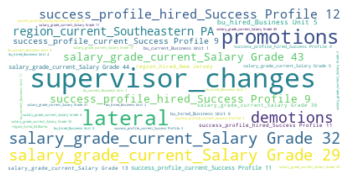

In [841]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(background_color="white", max_words=1000).generate_from_frequencies(feature_importance.set_index('feature')['score'].to_dict())
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [868]:
all_employee_negative = feature_importance.sort_values('score')[:10]

In [842]:
all_employee_positive = feature_importance.sort_values('score', ascending=False)[:10]

In [847]:
all_employee_positive

,feature,score
6,supervisor_changes,239.545964
4,lateral,129.923996
5,promotions,122.301010
81,salary_grade_current_Salary Grade 32,121.303625
77,salary_grade_current_Salary Grade 29,119.585576
3,demotions,103.151015
17,success_profile_hired_Success Profile 12,90.585942
43,region_current_Southeastern PA,75.491213
93,salary_grade_current_Salary Grade 43,68.986814
24,success_profile_hired_Success Profile 9,66.198043


In [798]:
all_employee_eoc = feature_importance[feature_importance.feature == 'eoc']

In [779]:
X_non_bus_5 = X[X['bu_current_Business Unit 5'] == 0]
y_non_bus_5 = merged_df[merged_df['bu_current'] != 'Business Unit 5'].term_in_X_year

In [780]:
log_clf_non_bu_5 = LogisticRegression(random_state=0, max_iter=10000).fit(X_non_bus_5, y_non_bus_5)
log_clf_non_bu_5.score(X_non_bus_5, y_non_bus_5)

0.9114285714285715

In [856]:
importance_non_bu_5 = log_clf_non_bu_5.coef_[0]
feature_importance_non_bu_5=pd.DataFrame(columns=['feature', 'score'])
# summarize feature importance
for i,v in enumerate(importance_non_bu_5):
    feature_importance_non_bu_5.loc[i] = [X_non_bus_5.columns[i]] + [v]
feature_importance_non_bu_5.score = feature_importance_non_bu_5.score * -1 * 100

In [857]:
non_bu_5_employee_negative = feature_importance_non_bu_5.sort_values('score')[:10]

In [858]:
non_bu_5_employee_positive = feature_importance_non_bu_5.sort_values('score', ascending=False)[:10]

In [812]:
non_bu_5_employee_eoc = feature_importance_non_bu_5[feature_importance_non_bu_5.feature == 'eoc']

In [785]:
X_bus_5 = X[X['bu_current_Business Unit 5'] == 1]
y_bus_5 = merged_df[merged_df['bu_current'] == 'Business Unit 5'].term_in_X_year

In [786]:
log_clf_bu_5 = LogisticRegression(random_state=0, max_iter=10000).fit(X_bus_5, y_bus_5)
log_clf_bu_5.score(X_bus_5, y_bus_5)

0.8581129378127234

In [859]:
importance_bu_5 = log_clf_bu_5.coef_[0]
feature_importance_bu_5=pd.DataFrame(columns=['feature', 'score'])
# summarize feature importance
for i,v in enumerate(importance_bu_5):
    feature_importance_bu_5.loc[i] = [X_bus_5.columns[i]] + [v]
feature_importance_bu_5.score = feature_importance_bu_5.score * -1 * 100

In [861]:
bu_5_employee_negative = feature_importance_bu_5.sort_values('score')[:10]

In [860]:
bu_5_employee_positive = feature_importance_bu_5.sort_values('score', ascending=False)[:10]

In [813]:
bu_5_employee_eoc = feature_importance_non_bu_5[feature_importance_bu_5.feature == 'eoc']

In [803]:
import seaborn as sns

def plot_feature_importance(importance,model_type,model_cat):

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=importance['score'], y=importance['feature'])
    #Add chart labels
    plt.title(model_cat + ' ' + 'Top 10 ' + model_type + ' factors for retention')
    plt.xlabel('Factor importance')
    plt.ylabel('Factor name')

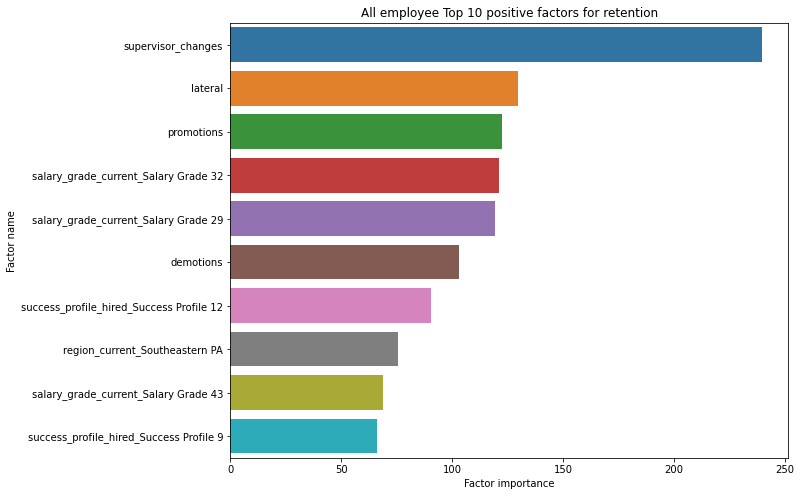

In [843]:
plot_feature_importance(all_employee_positive, 'positive', 'All employee')

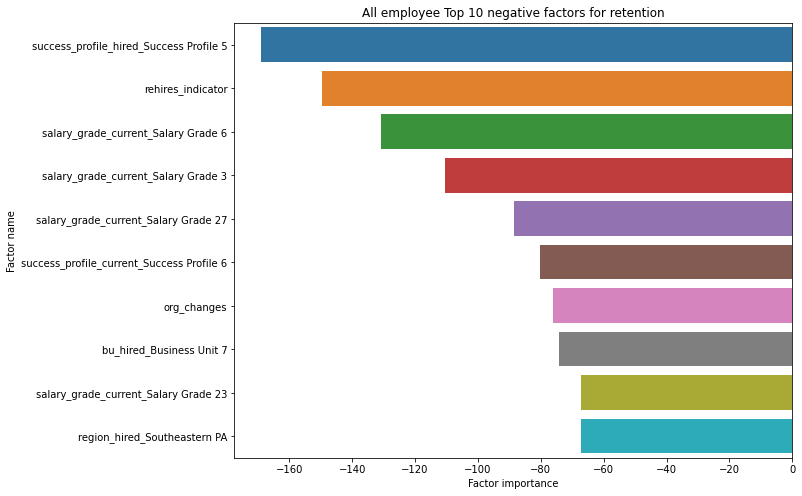

In [869]:
plot_feature_importance(all_employee_negative, 'negative', 'All employee')

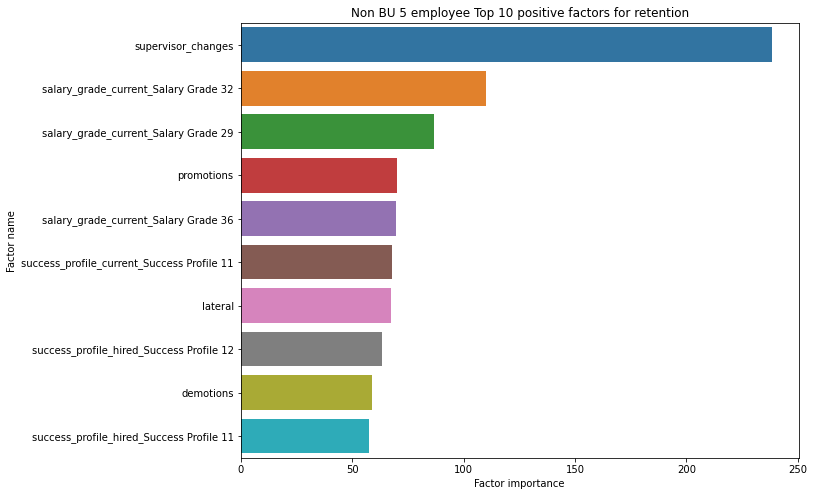

In [864]:
plot_feature_importance(non_bu_5_employee_positive, 'positive', 'Non BU 5 employee')

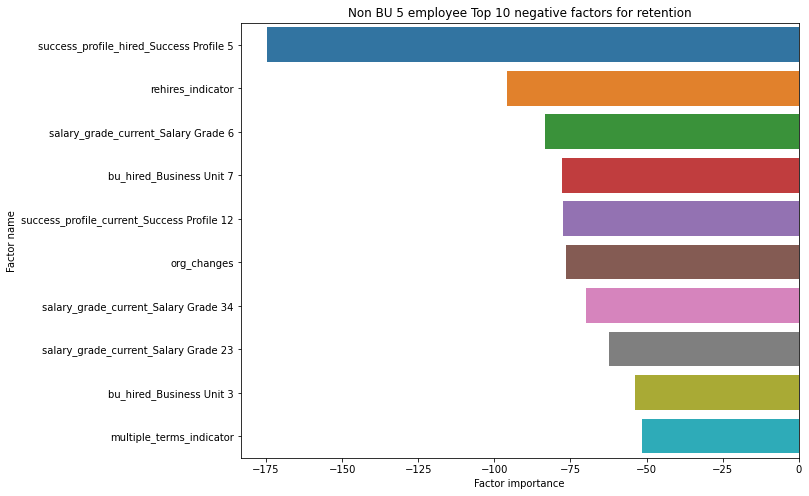

In [863]:
plot_feature_importance(non_bu_5_employee_negative, 'negative', 'Non BU 5 employee')

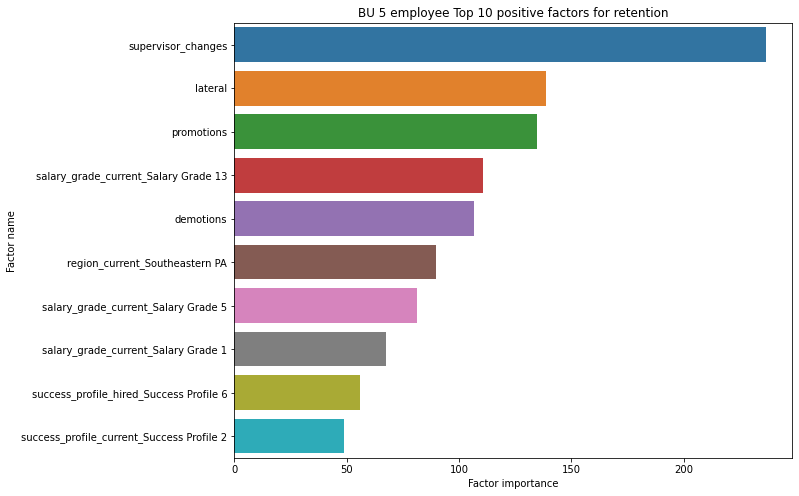

In [865]:
plot_feature_importance(bu_5_employee_positive, 'positive', 'BU 5 employee')

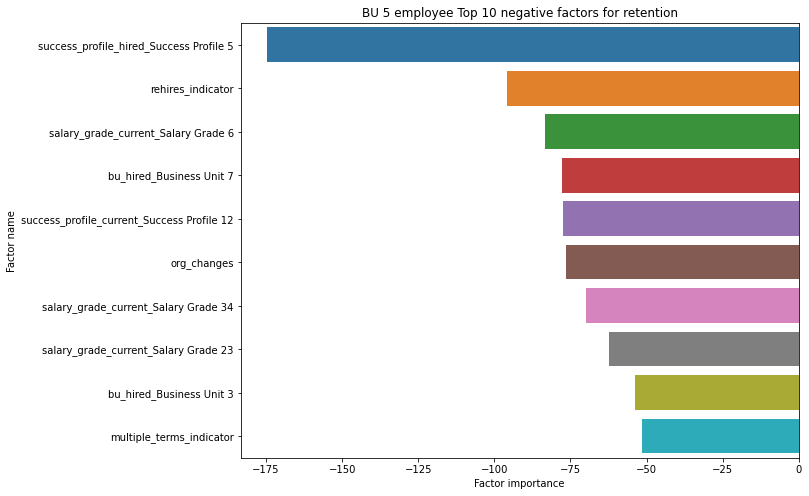

In [866]:
plot_feature_importance(non_bu_5_employee_negative, 'negative', 'BU 5 employee')

In [831]:
all_employee_negative.to_dict()['feature']

{20: 'success_profile_hired_Success Profile 5',
 1: 'rehires_indicator',
 98: 'salary_grade_current_Salary Grade 6',
 78: 'salary_grade_current_Salary Grade 3',
 75: 'salary_grade_current_Salary Grade 27',
 53: 'success_profile_current_Success Profile 6',
 7: 'org_changes',
 36: 'bu_hired_Business Unit 7',
 71: 'salary_grade_current_Salary Grade 23',
 12: 'region_hired_Southeastern PA'}

In [415]:
employee_start_date_df['Seniority Date'] = pd.to_datetime(employee_start_date_df['Seniority Date'], format = '%m/%d/%Y', errors='ignore')
employee_start_date_df['Effective Date y'] = pd.to_datetime(employee_start_date_df['Effective Date y'], format = '%m/%d/%Y', errors='ignore')

In [419]:
employee_start_date_df = employee_start_date_df.groupby('EEID Hash').min().reset_index()

In [422]:
def tmp(row):
    if pd.isnull(row['Seniority Date']):
        if pd.isnull(row['Effective Date y']):
            return 0
        else:
            return row['Effective Date y']
    elif pd.isnull(row['Effective Date y']):
        return row['Seniority Date']
    else:
        if row['Seniority Date'] < row['Effective Date y']:
            return row['Seniority Date']
        else:
            row['Effective Date y']
employee_start_date_df['start_date'] = employee_start_date_df.apply(tmp, axis=1)

In [425]:
employee_start_date_df = employee_start_date_df[['EEID Hash', 'start_date']]

In [436]:
employee_start_date_df.to_csv('/Users/mengtianli/Downloads/HR/employee_start_date.csv', index=False)

In [333]:
merged_df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'EEID Hash',
       'Unnamed: 0 x', 'Data Year x', 'Region x', 'State x',
       'Employee of Color x', 'Randomized Key Job Code x',
       'Randomized Key Success Profile x', 'Manager EEID Hash x',
       'Randomized Key Company Code x', 'Randomized Key Division Code x',
       'Randomized Key Department Code x', 'Randomized Key Function Code x',
       'Randomized Key Cost Center x', 'Randomized Key Business Unit x',
       'Randomized Key Location x', 'Randomized Key Market x',
       'System ID Hash', 'Effective Date x', 'Change Reason_x', 'Req ID Hash',
       'exclude x', 'rehire', 'Unnamed: 0 y', 'Data Year y',
       'Effective Date y', 'Voluntary/Involuntary', 'Termination Type',
       'Region y', 'State y', 'Employee of Color y',
       'Randomized Key Job Code y', 'Randomized Key Success Profile y',
       'Manager EEID Hash y', 'Randomized Key Company Code y',
       'Randomized Key Division Code y', 'Randomized Key 

In [342]:
merged_df.groupby('EEID Hash')['Manager EEID Hash'].count().value_counts()

0     944
2     770
1     765
3     757
4     732
5     635
6     489
7     368
8     234
9     144
10     66
11     45
12     19
13     12
14      8
15      4
18      1
19      1
Name: Manager EEID Hash, dtype: int64

In [370]:
merged_df = merged_df.dropna(axis=1, how='all')

In [429]:
internal_applications_df = application_df[application_df['EEID Hash'] != 'e4d1ed3c58a81958714201209ad0cfe4c84800d07afa929f615cc19c92d391ee'].groupby('EEID Hash')['Application Date'].count().reset_index().rename(columns={'Application Date': 'num_applications'})
internal_applications_df.sort_values('num_applications')

,EEID Hash,num_applications
1176,4e3779de27018c2637a4a51dd794274e1bf792a4f3680d...,1
1533,663b101e2c6f27b7aa29e274a6513bf06ca74e098317ec...,1
1532,66279cdd33de21f3e3c7092c4d2c8aeab6bb527d0b2a37...,1
1531,661eda34f0a58514a9282064f863800b3dbe5678551947...,1
1530,661ccdbe29d75f79ccda8e449dba561ae787186959983e...,1
...,...,...
3363,dedbe2deec1edc1b3810b00b0c472fc0a207bfe46678df...,20
3814,fd823ecc7de948871d8f787d63eb9edc10fc731036510a...,21
1493,641177500dd88c165e318876934d2fa96c3e4d39a68566...,22
2714,b2e85f3a1338ca0ee4ea6b8dd35f4737a16e6e166aba37...,23


In [433]:
internal_applications_df.num_applications = internal_applications_df.num_applications - 1

In [435]:
internal_applications_df.to_csv('/Users/mengtianli/Downloads/HR/num_applications.csv', index=False)

In [368]:
applications_df['Application Date'].value_counts()

1      544
2      504
4      320
3      289
6      271
      ... 
117      1
88       1
84       1
52       1
135      1
Name: Application Date, Length: 65, dtype: int64

In [356]:
merged_df = merged_df.merge(applications_df, on='EEID Hash', how='left')

In [360]:
merged_df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'EEID Hash',
       'Unnamed: 0 x', 'Data Year x', 'Region x', 'State x',
       'Employee of Color x', 'Randomized Key Job Code x',
       'Randomized Key Success Profile x', 'Manager EEID Hash x',
       'Randomized Key Company Code x', 'Randomized Key Division Code x',
       'Randomized Key Department Code x', 'Randomized Key Function Code x',
       'Randomized Key Cost Center x', 'Randomized Key Business Unit x',
       'Randomized Key Location x', 'Randomized Key Market x',
       'System ID Hash', 'Effective Date x', 'Change Reason_x', 'Req ID Hash',
       'exclude x', 'rehire', 'Unnamed: 0 y', 'Data Year y',
       'Effective Date y', 'Voluntary/Involuntary', 'Termination Type',
       'Region y', 'State y', 'Employee of Color y',
       'Randomized Key Job Code y', 'Randomized Key Success Profile y',
       'Manager EEID Hash y', 'Randomized Key Company Code y',
       'Randomized Key Division Code y', 'Randomized Key 

In [362]:
merged_df = merged_df.drop(columns='num application', axis=1)

In [364]:
merged_df = merged_df.rename(columns={"Application Date": "num_applications"})
merged_df.num_applications.fillna(0)
                          

0        6.0
1        6.0
2        6.0
3        5.0
4        5.0
        ... 
22044    4.0
22045    4.0
22046    4.0
22047    4.0
22048    2.0
Name: num_applications, Length: 22049, dtype: float64

In [365]:
merged_df.num_applications.value_counts()

6.0      1049
4.0       956
2.0       770
8.0       770
5.0       736
         ... 
63.0        9
128.0       8
98.0        7
84.0        7
114.0       6
Name: num_applications, Length: 65, dtype: int64

In [345]:
internal_application['Candidate Type'].value_counts()

Applicant        1696
Internal Hire     783
External Hire      96
Name: Candidate Type, dtype: int64

In [316]:
merged_df.to_csv('/Users/mengtianli/Downloads/HR/final_table.csv', index=False)

In [315]:
merged_df['Org Level Change'].value_counts()

1    12815
2     4315
0     3639
3      918
5      184
4      145
6       33
Name: Org Level Change, dtype: int64

In [93]:
attrition_df = pd.read_csv('/Users/mengtianli/Downloads/HR/attrition.csv')

In [95]:
attrition_df.columns

Index(['Unnamed: 0_x', 'Data Year_x', 'Effective Date_x', 'Change Reason',
       'Region_x', 'State_x', 'Employee of Color_x', 'Req ID Hash',
       'Randomized Key Job Code_x', 'Job Title_x',
       'Randomized Key Success Profile_x', 'Manager EEID Hash_x',
       'Manager Name_x', 'Randomized Key Company Code_x',
       'Randomized Key Division Code_x', 'Division_x',
       'Randomized Key Department Code_x', 'Department_x',
       'Randomized Key Function Code_x', 'Function_x',
       'Randomized Key Cost Center_x', 'Randomized Key Business Unit_x',
       'Location Code_x', 'Randomized Key Location_x',
       'Randomized Key Market_x', 'EEID Hash', 'First Name_x', 'Last Name_x',
       'Race/Ethnicity_x', 'Gender_x', 'Disabled_x', 'Veteran_x',
       'Unnamed: 0_y', 'Data Year_y', 'Effective Date_y',
       'Voluntary/Involuntary', 'Termination Type', 'Region_y', 'State_y',
       'Employee of Color_y', 'Randomized Key Job Code_y', 'Job Title_y',
       'Randomized Key Success Pro

In [99]:
attrition_df.merge(terms_df, on='EEID Hash').dropna(axis=1)['Termination Type_y'].value_counts()

Temporary Job Ended     1658
Voluntary Separation     873
Termed for Cause         201
Position Elimination      29
Other                      8
Name: Termination Type_y, dtype: int64

In [346]:
application_df['EEID Hash'].value_counts().sort_values()

cc6efc6c423116c7a0b4374102cbc28795dc94ac032717e6d0bf130098ffd7a1        1
090ca7f8da79d69cf728eb4df0f8479ce18fc77e463db893efb67d4dae2c0fa2        1
cf3e74fc10d437d8bbc49822b99696da1d5b3164b34559604b36d2ea5b00ed75        1
475c39d521018ec42fa71ad6008fab24a4b7d4fec7bc24b197f7e15c7eb7a41f        1
2fe86af20091bd13fd7c103605c582bd1fbef8c8796000a13817b99b15fbb70a        1
                                                                    ...  
fd823ecc7de948871d8f787d63eb9edc10fc731036510ac355b26bdc7c7f2f6d       21
641177500dd88c165e318876934d2fa96c3e4d39a6856697b0e9572b0800afd5       22
b2e85f3a1338ca0ee4ea6b8dd35f4737a16e6e166aba37c9d5a90efac4294498       23
32c25952689e0ddf49502139524d9d72f6cf0953464ce78df742246830782f93       62
e4d1ed3c58a81958714201209ad0cfe4c84800d07afa929f615cc19c92d391ee    36836
Name: EEID Hash, Length: 3853, dtype: int64

In [104]:
application_df = application_df.dropna(axis=1)

In [106]:
application_df[application_df['Candidate Type'] == 'Internal Hire']

,Unnamed: 0,Data Year,Position Type,Application Date,Candidate Type,Workflow Bin,Workflow Status,Workflow Disposition Code,Workflow Disposition Reason,Hire Month,...,TA EEID Hash,Manager EEID Hash,Randomized Key Division Code,Randomized Key Department Code,Randomized Key Function Code,Randomized Key Cost Center,Randomized Key Business Unit,Randomized Key Location,System ID Hash,EEID Hash
13,13,2018,Full-Time,01/16/2018,Internal Hire,Hired,*Onboarding Completed-Internal,HIRED-INTERNAL,Hired-Internal,January,...,bffca19398e7a8ec73d6d38c9f8dd4e55a76d52e1f3d5e...,f094c2b3f92c59192217d05fe70e321608ff9aefca5b13...,Division Code 29,Department Code 374,Function Code 367,Cost Center 226,Business Unit 12,Location 29,c7bc50a85ea938d4dbda61f9eec19b57f2cde78e0a5644...,da87ae7a35147816e664f537759ebeb62a3819e073aa74...
72,72,2017,Full-Time,11/15/2017,Internal Hire,Hired,*Onboarding Completed-Internal,HIRED-INTERNAL,Hired-Internal,December,...,377898fa8095969191442cc5d917ea8dd19c2394de3a27...,f094c2b3f92c59192217d05fe70e321608ff9aefca5b13...,Division Code 29,Department Code 374,Function Code 367,Cost Center 226,Business Unit 12,Location 29,b1c8f769c5ac242892595d7ed96e8f51b7ab66f849ce4a...,a5549b936f41592323dfdddcc8eb5a47232362417b75c6...
131,131,2017,Full-Time,01/26/2017,Internal Hire,Hired,*Onboarding Completed-Internal,HIRED-INTERNAL,Hired-Internal,March,...,1142b14c6fa274e95f1adc01743c8046a336d4e6bab4d4...,f094c2b3f92c59192217d05fe70e321608ff9aefca5b13...,Division Code 29,Department Code 374,Function Code 367,Cost Center 226,Business Unit 12,Location 29,923ca5fcd8f318c43ba8670d7e0aaf8c0681209d525f60...,1ed9f8e9ee47c09e7c33eb97a60ccdad188d8bb8784581...
350,350,2018,Full-Time,05/21/2018,Internal Hire,Hired,*Push to Ultipro - Internal,HIRED-INTERNAL,Hired-Internal,July,...,377898fa8095969191442cc5d917ea8dd19c2394de3a27...,06824c7f9dc59b7f77b9646f3972e0c4ec7a8c5c48a46e...,Division Code 18,Department Code 212,Function Code 216,Cost Center 372,Business Unit 9,Location 29,81b9b71f012abb17e7a168373f6999a1ffb1c2da62711c...,1b38f34722f89f99efadfd5ffa82520ba31e03da4c28d1...
414,414,2019,Full-Time,05/04/2019,Internal Hire,Hired,*Push to Ultipro - Internal,HIRED-INTERNAL,Hired-Internal,June,...,377898fa8095969191442cc5d917ea8dd19c2394de3a27...,311436b43e32b1c156a5fbacf96dff74e896d1b10a5135...,Division Code 18,Department Code 221,Function Code 216,Cost Center 414,Business Unit 9,Location 29,d41343c168aced0516fb96c6c0a94e2852ced837bc2d19...,e1895f1e513f5b631434b1294286a29c68b56184836243...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44622,44622,2017,Full-Time,06/10/2017,Internal Hire,Hired,*Onboarding Completed-Internal,HIRED-INTERNAL,Hired-Internal,June,...,defc308f6a7685a86afc58630f90dc5c1d0e14a7c5c400...,dd16f70fc1dcbe6b52a54807b9f0ab9eef962a26ba0c92...,Division Code 25,Department Code 210,Function Code 33,Cost Center 244,Business Unit 5,Location 48,4de5dcff318c0ea35f38081688fa3384c7d1f837aaf5a8...,a5c0c7efeff9842720046a21d590a1622af19ab55cfcd4...
44624,44624,2018,Full-Time,04/11/2018,Internal Hire,Hired,*Push to Ultipro - Internal,HIRED-INTERNAL,Hired-Internal,April,...,defc308f6a7685a86afc58630f90dc5c1d0e14a7c5c400...,dd16f70fc1dcbe6b52a54807b9f0ab9eef962a26ba0c92...,Division Code 25,Department Code 210,Function Code 33,Cost Center 244,Business Unit 5,Location 48,bfa336fee5aebb07bbe328545207bb9f6b9757b2ef5ff6...,bb7e114606a748e6dbe99083260a398df8bcdffd417b1f...
44736,44736,2019,Full-Time,05/23/2019,Internal Hire,Hired,*Push to Ultipro - Internal,HIRED-INTERNAL,Hired-Internal,July,...,e0590fbf909a4a70e65d215d6f03d46fe3703707e61165...,a72850bacebae4410bfaba744a8cfa1c96dcac23e353fb...,Division Code 48,Department Code 189,Function Code 232,Cost Center 430,Business Unit 6,Location 69,b42fee1479002405746b3a429636bde587886d2a0053c3...,679f0b415a94f2353ac7381e56a5c9c17206ea132282dc...
44746,44746,2019,Full-Time,03/02/2019,Internal Hire,Hired,*Push to Ultipro - Internal,HIRED-INTERNAL,Hired-Internal,May,...,c930675

In [110]:
application_internal_df = application_df[(application_df['Candidate Type'] == 'Internal Hire') & (application_df['Position Type'] != 'Temporary')]

In [111]:
application_internal_df.shape

(1111, 26)

In [117]:
applicantion_count_per_EEID = application_internal_df['EEID Hash'].value_counts()

In [118]:
application_internal_df['num_application'] = application_internal_df.apply(lambda row: applicantion_count_per_EEID[row['EEID Hash']], axis=1)

<ipython-input-118-565b10fb3dca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_internal_df['num_application'] = application_internal_df.apply(lambda row: applicantion_count_per_EEID[row['EEID Hash']], axis=1)


In [125]:
application_internal_df = application_internal_df[['EEID Hash', 'num_application']].drop_duplicates()

In [129]:
application_internal_df

,EEID Hash,num_application
13,da87ae7a35147816e664f537759ebeb62a3819e073aa74...,1
72,a5549b936f41592323dfdddcc8eb5a47232362417b75c6...,1
131,1ed9f8e9ee47c09e7c33eb97a60ccdad188d8bb8784581...,1
350,1b38f34722f89f99efadfd5ffa82520ba31e03da4c28d1...,1
414,e1895f1e513f5b631434b1294286a29c68b56184836243...,1
...,...,...
44518,ddca23a9740c19b4a87aae4664a155a81d898729bbb953...,1
44545,cd5a3f74126969bb6d532e03704252eefb2d15e05b4a83...,1
44599,3d19e2fc5aecf7024eae63f94ae2401d668acf15abf2f6...,1
44736,679f0b415a94f2353ac7381e56a5c9c17206ea132282dc...,1


In [134]:
application_internal_df.to_csv('/Users/mengtianli/Downloads/HR/application_internal.csv', index=False)

In [132]:
roster_df = roster_df[roster_df['Randomized Key Success Profile'] != 'Success Profile 2']

,Unnamed: 0,Data Year,Region,State,Employee of Color,Randomized Key Job Code,Job Title,Randomized Key Success Profile,Manager EEID Hash,Manager Name,...,Randomized Key Location,Randomized Key Market,System ID Hash,EEID Hash,First Name,Last Name,Race/Ethnicity,Gender,Disabled,Veteran
0,0,2017,Central PA,PA,No,Job Code 3972,NaN,Success Profile 3,ee605efa196bda7c1fcc67c8901e302f36354ec718ee82...,NaN,...,Location 29,Market 3,5abe33fa767e839a152a0aecf3219eb49cda01d3fb3d20...,0026a2ad36a89c2e8a7985caea92b9d6d95dd6c3273557...,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017,Central PA,PA,No,Job Code 7888,NaN,Success Profile 8,af1ba03df1e2fa4125d1c4726e56dd94f2bf0f95ba703d...,NaN,...,Location 29,Market 3,f06547d9e1c10ec610f75517dbf77cceaa1e49618f32dc...,5c7e6f28691b3cf25225ec6860946b8d324d9ac7bd6e13...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018,Central PA,PA,No,Job Code 5409,NaN,Success Profile 8,af1ba03df1e2fa4125d1c4726e56dd94f2bf0f95ba703d...,NaN,...,Location 29,Market 3,f06547d9e1c10ec610f75517dbf77cceaa1e49618f32dc...,5c7e6f28691b3cf25225ec6860946b8d324d9ac7bd6e13...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019,Central PA,PA,No,Job Code 5409,NaN,Success Profile 8,af1ba03df1e2fa4125d1c4726e56dd94f2bf0f95ba703d...,NaN,...,Location 29,Market 3,f06547d9e1c10ec610f75517dbf77cceaa1e49618f32dc...,5c7e6f28691b3cf25225ec6860946b8d324d9ac7bd6e13...,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,Central PA,PA,No,Job Code 5409,NaN,Success Profile 8,af1ba03df1e2fa4125d1c4726e56dd94f2bf0f95ba703d...,NaN,...,Location 29,Market 3,f06547d9e1c10ec610f75517dbf77cceaa1e49618f32dc...,5c7e6f28691b3cf25225ec6860946b8d324d9ac7bd6e13...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14765,14765,2017,Central PA,PA,No,Job Code 6229,NaN,Success Profile 3,b03686268efe0c804a5af502b21513c234c4278ddfd871...,NaN,...,Location 294,Market 3,7675c9d4c4072f6a91113ed4918009d3032da6b058b725...,1f71c3b5b33f5773508def1fdf8f88e4a6440432301e8d...,NaN,NaN,NaN,NaN,NaN,NaN
14766,14766,2018,Central PA,PA,No,Job Code 6229,NaN,Success Profile 3,b03686268efe0c804a5af502b21513c234c4278ddfd871...,NaN,...,Location 294,Market 3,7675c9d4c4072f6a91113ed4918009d3032da6b058b725...,1f71c3b5b33f5773508def1fdf8f88e4a6440432301e8d...,NaN,NaN,NaN,NaN,NaN,NaN
14767,14767,2019,Central PA,PA,No,Job Code 6229,NaN,Success Profile 3,b03686268efe0c804a5af502b21513c234c4278ddfd871...,NaN,...,Location 294,Market 3,7675c9d4c4072f6a91113ed4918009d3032da6b058b725...,1f71c3b5b33f5773508def1fdf8f88e4a6440432301e8d...,NaN,NaN,NaN,NaN,NaN,NaN
14768,14768,2020,Central PA,PA,No,Job Code 2589,NaN,Success Profile 3,f7608660f1ad2c1231f98d37fb4a0a0c6b52dde05c5f68...,NaN,...,Location 294,Market 3,7675c9d4c4072f6a91113ed4918009d3032da6b058b725...,1f71c3b5b33f5773508def1fdf8f88e4a6440432301e8d...,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
roster_df[roster_df['EEID Hash'] == '801eade1192f5b3d2ec091ee75e06f245dcad18d674948dc524d0c84390bc320']

,Unnamed: 0,Data Year,Region,State,Employee of Color,Randomized Key Job Code,Job Title,Randomized Key Success Profile,Manager EEID Hash,Manager Name,...,Randomized Key Location,Randomized Key Market,System ID Hash,EEID Hash,First Name,Last Name,Race/Ethnicity,Gender,Disabled,Veteran
8799,8799,2017,Central PA,PA,No,Job Code 1871,NaN,Success Profile 3,665ba6a1d35d69b097de110a5e64da55fef735b30a73ff...,NaN,...,NaN,Market 3,9a37050867f8fe52dc393e87002f357ead4d16dfe89e04...,801eade1192f5b3d2ec091ee75e06f245dcad18d674948...,NaN,NaN,NaN,NaN,NaN,NaN
8800,8800,2018,Central PA,PA,No,Job Code 1871,NaN,Success Profile 3,7309fc867fd9710716b7318422aa4ec23b461de620c230...,NaN,...,NaN,Market 3,9a37050867f8fe52dc393e87002f357ead4d16dfe89e04...,801eade1192f5b3d2ec091ee75e06f245dcad18d674948...,NaN,NaN,NaN,NaN,NaN,NaN
8801,8801,2019,Central PA,PA,No,Job Code 1871,NaN,Success Profile 3,7309fc867fd9710716b7318422aa4ec23b461de620c230...,NaN,...,NaN,Market 3,9a37050867f8fe52dc393e87002f357ead4d16dfe89e04...,801eade1192f5b3d2ec091ee75e06f245dcad18d674948...,NaN,NaN,NaN,NaN,NaN,NaN
12804,12804,2020,Central PA,PA,No,Job Code 7314,NaN,Success Profile 8,95bd9eaa2a253e4f69dcc39aa8a1aa401655b369f61419...,NaN,...,Location 103,Market 1,9a37050867f8fe52dc393e87002f357ead4d16dfe89e04...,801eade1192f5b3d2ec091ee75e06f245dcad18d674948...,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
terms_df['Termination Type'].unique()

array(['Voluntary Separation', 'Termed for Cause', 'Temporary Job Ended',
       'Position Elimination', 'Other'], dtype=object)

In [47]:
terms_df = terms_df.dropna(axis=1)
terms_df = terms_df[terms_df['Termination Type'] != 'Temporary Job Ended']

In [48]:
terms_df['Termination Type'].unique()

array(['Voluntary Separation', 'Termed for Cause', 'Position Elimination',
       'Other'], dtype=object)

In [49]:
terms_df.groupby('EEID Hash')['Termination Type'].count()

EEID Hash
40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c36d89f826dbc40118b7    3
4c76943575befdb54e8e65ff4b5a3cb6a4079cba6cc6359fe7b8c0e5e6d01e0d    2
d6c97b95939943d61841603e6c841bc610b67b15af4a55809437be52ef85c4a7    2
bb1155a2fd347bd77fb25a0a552d0ffb1d74f93d4f3518610ecbef894c99397b    2
794576a82498358fc1bf557c76ef9f1122d9beda4d9a9538dbf6b222ff6ee5fe    2
                                                                   ..
a87d70e7d6bc182c191e201aa5f739e4cfa8d9ff0e413a2a128c979d4e2d3be9    1
a860ac7cb585d0f21ad9e5083edb72331624ff9d4e3b13d0488cd97a4e3864b4    1
a8426d4a8b96a223ec9e92319d643374cf0357181c02cb6628de41ae873f997c    1
a8302d1754ab3896da03415ab2733730f51a5f987f2a4d60ed57abe89d5c61a7    1
0026a2ad36a89c2e8a7985caea92b9d6d95dd6c32735570f010faa344590deb0    1
Name: Termination Type, Length: 2520, dtype: int64

In [51]:
terms_df[terms_df['EEID Hash'] == '40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c36d89f826dbc40118b7']

,Unnamed: 0,Data Year,Effective Date,Voluntary/Involuntary,Termination Type,Region,State,Employee of Color,Randomized Key Job Code,Randomized Key Success Profile,Manager EEID Hash,Randomized Key Company Code,Randomized Key Division Code,Randomized Key Department Code,Randomized Key Function Code,Randomized Key Cost Center,Randomized Key Business Unit,Randomized Key Location,Randomized Key Market,EEID Hash
48,48,2018,01/18/2018,Voluntary,Voluntary Separation,Southeastern PA,PA,No,Job Code 4476,Success Profile 5,dd13be2f55c2232b50f6deda8c0896ed7587d220260e51...,Company Code 11,Division Code 31,Department Code 276,Function Code 297,Cost Center 239,Business Unit 5,Location 344,Market 7,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...
62,62,2017,08/15/2017,Voluntary,Voluntary Separation,Southeastern PA,PA,No,Job Code 4476,Success Profile 5,dd13be2f55c2232b50f6deda8c0896ed7587d220260e51...,Company Code 11,Division Code 31,Department Code 276,Function Code 297,Cost Center 239,Business Unit 5,Location 344,Market 7,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...
2392,2392,2019,11/12/2019,Voluntary,Voluntary Separation,Southeastern PA,PA,No,Job Code 4126,Success Profile 5,a4ee4eb813063e34a1e7bfe1c61d7e012f42ba573251e8...,Company Code 11,Division Code 48,Department Code 189,Function Code 232,Cost Center 171,Business Unit 5,Location 256,Market 7,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...


In [144]:
new_hire_df[new_hire_df['EEID Hash'] == '40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c36d89f826dbc40118b7']

,Unnamed: 0,Data Year,Effective Date,Change Reason,Region,State,Employee of Color,Req ID Hash,Randomized Key Job Code,Job Title,...,Location Code,Randomized Key Location,Randomized Key Market,EEID Hash,First Name,Last Name,Race/Ethnicity,Gender,Disabled,Veteran
62,62,2017,11/27/2017,New Hire,Central PA,PA,No,e4f5b0f834054c9fa24103c157cb5ed2d5f896a1931201...,Job Code 3403,NaN,...,NaN,Location 14,Market 14,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...,NaN,NaN,NaN,NaN,NaN,NaN
921,921,2018,12/18/2018,Rehire,Southeastern PA,PA,No,c3dbc7033deb0f3fdd13242eef7b56878febc491083d07...,Job Code 4775,NaN,...,NaN,Location 256,Market 7,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...,NaN,NaN,NaN,NaN,NaN,NaN
932,932,2018,06/08/2018,Rehire,Southeastern PA,PA,No,c710bb9edf8c9d392ae02274612d0bb6c573b1ca71de6f...,Job Code 3403,NaN,...,NaN,Location 419,Market 4,40c015229c5a8ca6e4fe6429b62813c14c4377a548d8c3...,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
job_applications_df.groupby('Candidate Type').count()

,Unnamed: 0,Data Year,Position Type,Application Date,Workflow Bin,Workflow Status,Workflow Disposition Code,Workflow Disposition Reason,Hire Month,Start Date,...,Randomized Key Location,Market,System ID Hash,EEID Hash,First Name,Last Name,Race/Ethnicity,Gender,Disabled,Veteran
Candidate Type,,,,,,,,,,,,,,,,,,,,,
Applicant,41607,41607,41607,41607,41607,41607,41607,41607,41607,352,...,41607,0,41607,41607,0,0,0,0,0,0
External Hire,2594,2594,2594,2594,2594,2594,2594,2594,2594,2594,...,2594,0,2594,2594,0,0,0,0,0,0
Internal Hire,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,...,1115,0,1115,1115,0,0,0,0,0,0


In [16]:
job_applications_df.dropna(axis=1)[['Randomized Key Success Profile']]

,Randomized Key Success Profile
0,Success Profile 8
1,Success Profile 8
2,Success Profile 8
3,Success Profile 8
4,Success Profile 8
...,...
45311,Success Profile 2
45312,Success Profile 2
45313,Success Profile 2
45314,Success Profile 2


In [13]:
EOC_2017_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Quantum BU - EOC 2017.csv')

In [24]:
EOC_2018_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Quantum BU - EOC 2018.csv')

In [25]:
EOC_2019_df = pd.read_csv('/Users/mengtianli/Downloads/HR/HR Quantum BU - EOC 2019.csv')

In [17]:
EOC_2017_df.columns

Index(['Unnamed: 0', 'Employee of Color', 'Report Sequence', 'Category',
       'Series', 'Valid N', 'Count of Responses', 'Average Score',
       'Favorable Percent', 'Neutral Percent', 'Unfavorable Percent',
       '6. Strongly Agree', '5. Agree', '4. Somewhat Agree',
       '3. Somewhat Disagree', '2. Disagree', '1. Strongly Disagree',
       '6. Strongly Agree %', '5. Agree %', '4. Somewhat Agree %',
       '3. Somewhat Disagree %', '2. Disagree %', '1. Strongly Disagree %',
       'Unnamed: 23', 'Randomized Key Business Unit'],
      dtype='object')

In [23]:
EOC_2017_df.shape

(378, 25)

In [26]:
EOC_2018_df.shape

(405, 24)

In [28]:
EOC_2019_df.head()

,Unnamed: 0,Employee of Color,Report Sequence,Category,Series,Valid N,Count of Responses,Average Score,Favorable Percent,Neutral Percent,...,3. Somewhat Disagree,2. Disagree,1. Strongly Disagree,6. Strongly Agree %,5. Agree %,4. Somewhat Agree %,3. Somewhat Disagree %,2. Disagree %,1. Strongly Disagree %,Randomized Key Business Unit
0,0,No,1,Alignment with Goals,Fulton Financial (Filtered),2283.0,4565.0,4.56,59.58%,35.22%,...,383.0,165.0,72.0,17.09%,42.50%,26.83%,8.39%,3.61%,1.58%,NaN
1,1,No,2,Alignment with Goals,Fulton Financial (Filtered),27.0,54.0,4.80,68.52%,29.63%,...,3.0,0.0,1.0,22.22%,46.30%,24.07%,5.56%,0.00%,1.85%,Business Unit 12
2,2,No,3,Alignment with Goals,Fulton Financial (Filtered),422.0,844.0,4.59,61.02%,34.12%,...,76.0,30.0,11.0,17.89%,43.13%,25.12%,9.00%,3.55%,1.30%,Business Unit 9
3,3,No,4,Alignment with Goals,Fulton Financial (Filtered),754.0,1507.0,4.57,60.32%,34.57%,...,138.0,47.0,30.0,18.12%,42.20%,25.41%,9.16%,3.12%,1.99%,Business Unit 5
4,4,No,5,Alignment with Goals,Fulton Financial (Filtered),127.0,254.0,4.64,62.20%,32.68%,...,17.0,12.0,1.0,19.29%,42.91%,25.98%,6.69%,4.72%,0.39%,Business Unit 6


In [160]:
merged_df = merged_df.dropna(axis=1)

In [252]:
merged_df.shape

(5994, 80)

In [251]:
merged_df = merged_df.merge(application_internal_df, on='EEID Hash', how='left')

In [253]:
merged_df['num_application'] = merged_df['num_application'].fillna(0)

In [254]:
merged_df=merged_df.dropna(axis=1, how='all')

In [255]:
len(merged_df.columns)

55

In [299]:
merged_df.to_csv('/Users/mengtianli/Downloads/HR/fill_job_code_y.csv', index=False)

In [303]:
merged_df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'EEID Hash',
       'Unnamed: 0 x', 'Data Year x', 'Region x', 'State x',
       'Employee of Color x', 'Randomized Key Job Code x',
       ...
       'Randomized Key Business Unit', 'Location Code',
       'Randomized Key Location', 'Randomized Key Market', 'First Name',
       'Last Name', 'Race/Ethnicity', 'Gender', 'Disabled', 'Veteran'],
      dtype='object', length=103)

In [304]:
len(merged_df.columns)

103

In [300]:
merged_df.shape

(22049, 103)

In [277]:
merged_df.multiple_terms.isna().value_counts()

AttributeError: 'DataFrame' object has no attribute 'multiple_terms'

In [223]:
job_code_df = merged_df[['Randomized Key Job Code x', 'Randomized Key Job Code y']].dropna()

In [224]:
(job_code_df['Randomized Key Job Code x'] != job_code_df['Randomized Key Job Code y']).value_counts()

False    1898
True      579
dtype: int64

In [225]:
changes_df.columns

Index(['Unnamed: 0', 'Data Year', 'Effective Date', 'Change Reason', 'Region',
       'State', 'Employee of Color', 'Randomized Key Job Title', 'Job Title',
       'Randomized Key Success Profile', 'Manager EEID Hash', 'Manager Name',
       'Job Change Reason', 'Randomized Key Company Code',
       'Randomized Key Division Code', 'Division',
       'Randomized Key Department Code', 'Department',
       'Randomized Key Function Code', 'Function',
       'Randomized Key Cost Center', 'Randomized Key Business Unit',
       'Location Code', 'Randomized Key Location', 'Randomized Key Market',
       'EEID Hash', 'First Name', 'Last Name', 'Race/Ethnicity', 'Gender',
       'Disabled', 'Veteran'],
      dtype='object')

In [286]:
df_latest_job_code = changes_df.sort_values('Effective Date').groupby('EEID Hash').last().reset_index()[['EEID Hash', 'Randomized Key Job Title']]

In [287]:
merged_df = merged_df.merge(changes_df, how='left', on='EEID Hash')

In [291]:
merged_df['Randomized Key Job Code y'] = merged_df.apply(lambda row: row['Randomized Key Job Title'] if pd.isnull(row['Randomized Key Job Code y']) else row['Randomized Key Job Code y'], axis=1)

In [298]:
merged_df['Randomized Key Job Code y'].isna().value_counts()

False    22049
Name: Randomized Key Job Code y, dtype: int64

In [297]:
merged_df['Randomized Key Job Code y'] = merged_df.apply(lambda row: row['Randomized Key Job Code x'] if pd.isnull(row['Randomized Key Job Code y']) else row['Randomized Key Job Code y'], axis=1)

In [282]:
merged_df[merged_df['Randomized Key Job Code y'].isna()]['EEID Hash'].isin(df_latest_job_code['EEID Hash']).value_counts()

True     3222
False     267
Name: EEID Hash, dtype: int64

In [267]:
df_latest_job_code.value_counts()

EEID Hash                                                         Randomized Key Job Title
fff24422dd53454cff9107833d1be20d42df0a8c6f817043f084cb62d405b9f1  Job Code 7285               1
549357e291f8d1755f8090f1f33e0e886641f1dfd6e8e20da8d2f2345cdbadaa  Job Code 3064               1
555f7170d912e39cf356083d4fb6f484c0c20827317b812511af82bb9161f005  Job Code 5802               1
55640ac0b996cffcb6b4ddb4397b6cdbabc36856b0c4161814d7fb5f2de642b5  Job Code 4449               1
556799f941b7934be1b613e7d7dad69482db940be9349b84014688b76590443b  Job Code 7761               1
                                                                                             ..
aaa93bfccce329c28cc9d7ffb85a1f4937aa49817dcaecb36da5f3436fce145c  Job Code 4164               1
aab9b3b4205a71adcb938503d2f8bab6678b77425a435207ccf9a074e30e7aea  Job Code 4861               1
aabc9884511f8841c733618b099ded9c4126e58701dee3d6a79e3a54e61ad3eb  Job Code 1546               1
aacc24d2636e27a0ba0dc096c3f9b035a7226cfb84395

In [301]:
merged_df.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,EEID Hash,Unnamed: 0 x,Data Year x,Region x,State x,Employee of Color x,Randomized Key Job Code x,...,Randomized Key Business Unit,Location Code,Randomized Key Location,Randomized Key Market,First Name,Last Name,Race/Ethnicity,Gender,Disabled,Veteran
0,0,0,0,00139bda1e4e47e192d87b3a17e0e68280dbb4d259fcfb...,697,2017,DelMarVa,VA,No,Job Code 5976,...,Business Unit 9,NaN,Location 188,Market 12,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,00139bda1e4e47e192d87b3a17e0e68280dbb4d259fcfb...,697,2017,DelMarVa,VA,No,Job Code 5976,...,Business Unit 9,NaN,Location 188,Market 12,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,00139bda1e4e47e192d87b3a17e0e68280dbb4d259fcfb...,697,2017,DelMarVa,VA,No,Job Code 5976,...,Business Unit 9,NaN,Location 188,Market 12,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,001a45dd8c745c17432b6e8bb3f7eae08cb216df1d4f64...,12915,2017,Central PA,PA,No,Job Code 7114,...,Business Unit 9,NaN,Location 457,Market 7,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,001a45dd8c745c17432b6e8bb3f7eae08cb216df1d4f64...,12915,2017,Central PA,PA,No,Job Code 7114,...,Business Unit 9,NaN,Location 401,Market 6,NaN,NaN,NaN,NaN,NaN,NaN
